In [105]:
library(forecast)
library(tseries)
library(lmtest)
library(Hmisc)

options(repr.plot.width = 8, repr.plot.height = 4)

Сгенерируем временной ряд из двух стационарных кусков

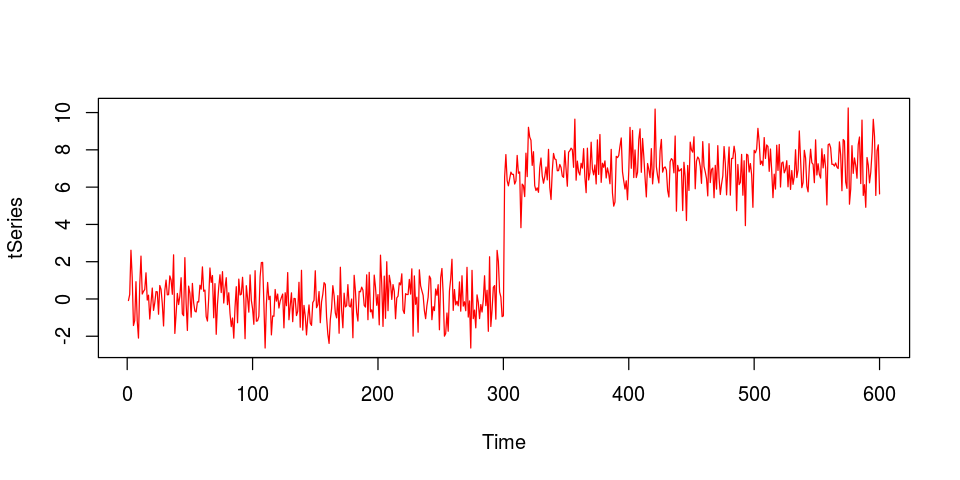

In [26]:
x <- c(rnorm(n = 300), rnorm(n = 300, mean = 7))
tSeries <- ts(data = x)  # создание объекта временного ряда

plot(tSeries, type = 'l', col = 'red')

Функция, реализующая различные виды экспоненциального сглаживания.

`ets(y, model="ZZZ", damped=NULL, alpha=NULL, beta=NULL, gamma=NULL,
         phi=NULL, additive.only=FALSE, lambda=NULL, biasadj=FALSE,
         lower=c(rep(0.0001,3), 0.8), upper=c(rep(0.9999,3),0.98),
         opt.crit=c("lik","amse","mse","sigma","mae"), nmse=3,
         bounds=c("both","usual","admissible"), ic=c("aicc","aic","bic"),
         restrict=TRUE, allow.multiplicative.trend=FALSE, use.initial.values=FALSE, ...)`
         
Параметр `model`:

The first letter denotes the error type ("A", "M" or "Z"); the second letter denotes the trend type ("N","A","M" or "Z"); and the third letter denotes the season type ("N","A","M" or "Z"). In all cases, "N"=none, "A"=additive, "M"=multiplicative and "Z"=automatically selected.

Функция, реализующая предсказание ряда

`forecast(object, h = ifelse(frequency(object) > 1, 2 * frequency(object), 10) ,
              level=c(80,95), fan=FALSE, robust=FALSE, lambda=NULL, find.frequency=FALSE,
              allow.multiplicative.trend=FALSE, model=NULL,...)`

Применим их к нашему ряду

ETS(A,N,N) 

Call:
 ets(y = tSeries) 

  Smoothing parameters:
    alpha = 0.2056 

  Initial states:
    l = 0.3108 

  sigma:  1.2041

     AIC     AICc      BIC 
4067.085 4067.126 4080.276 

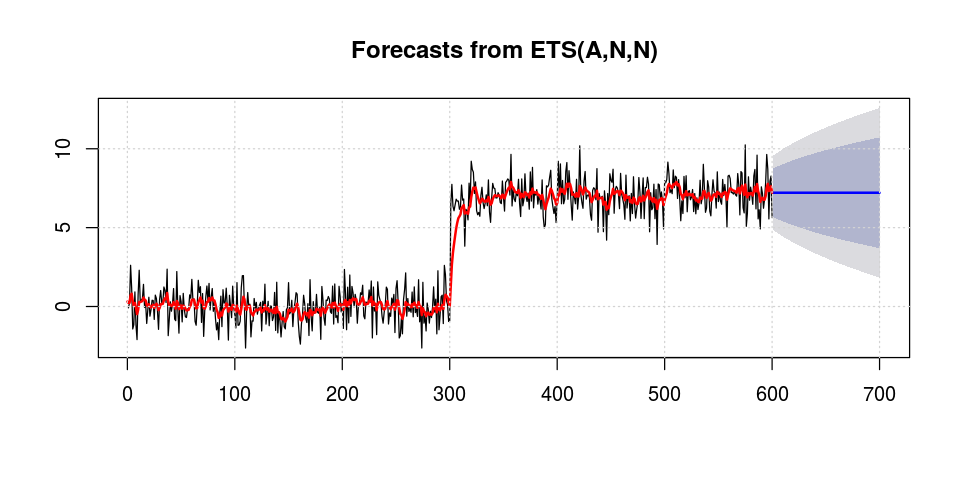

In [31]:
fitETS <- ets(tSeries)
fitETS

plot(forecast(fitETS, h = 100))
lines(fitETS$states[,1], col = 'red', lwd = 2)
grid()

Зададим параметр `alpha` вручную

ETS(A,N,N) 

Call:
 ets(y = tSeries, alpha = 0.5) 

  Smoothing parameters:
    alpha = 0.5 

  Initial states:
    l = 0.3529 

  sigma:  1.2726

     AIC     AICc      BIC 
4131.397 4131.418 4140.191 

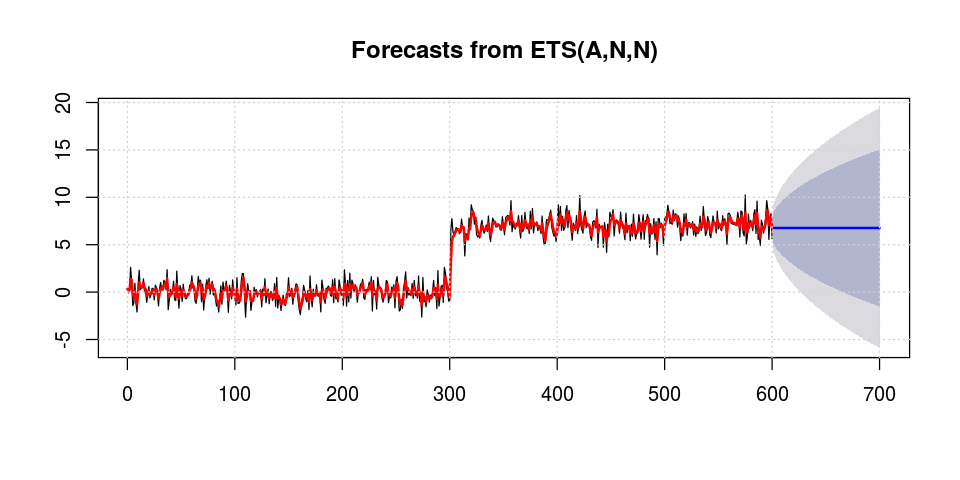

In [32]:
fitETS <- ets(tSeries, alpha = 0.5)
fitETS

plot(forecast(fitETS, h = 100))
lines(fitETS$states[,1], col = 'red', lwd = 2)
grid()

ETS(A,Ad,N) 

Call:
 ets(y = tSeries, alpha = 0.001) 

  Smoothing parameters:
    alpha = 0.001 
    beta  = 0.001 
    phi   = 0.9697 

  Initial states:
    l = 0.8636 
    b = -0.0232 

  sigma:  1.8804

     AIC     AICc      BIC 
4605.949 4606.050 4627.934 

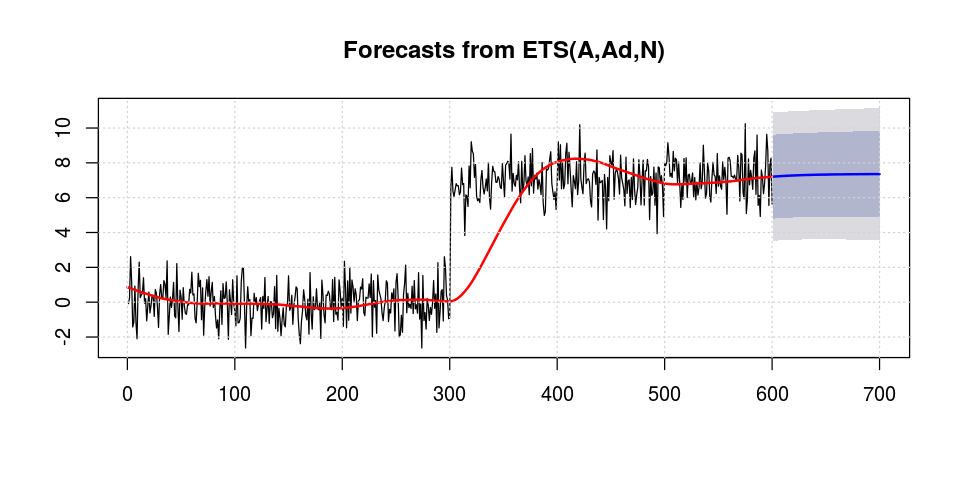

In [34]:
fitETS <- ets(tSeries, alpha = 0.001)
fitETS

plot(forecast(fitETS, h = 100))
lines(fitETS$states[,1], col = 'red', lwd = 2)
grid()

При большом `alpha` происходит сильная подстройка под исходный ряд, при маленьком -- сильное сглаживание.

Посмотрим на влияение различных моделей при малом `alpha`

ETS(A,Ad,N) 

Call:
 ets(y = tSeries, model = "AAZ", alpha = 0.001) 

  Smoothing parameters:
    alpha = 0.001 
    beta  = 0.001 
    phi   = 0.9697 

  Initial states:
    l = 0.8636 
    b = -0.0232 

  sigma:  1.8804

     AIC     AICc      BIC 
4605.949 4606.050 4627.934 

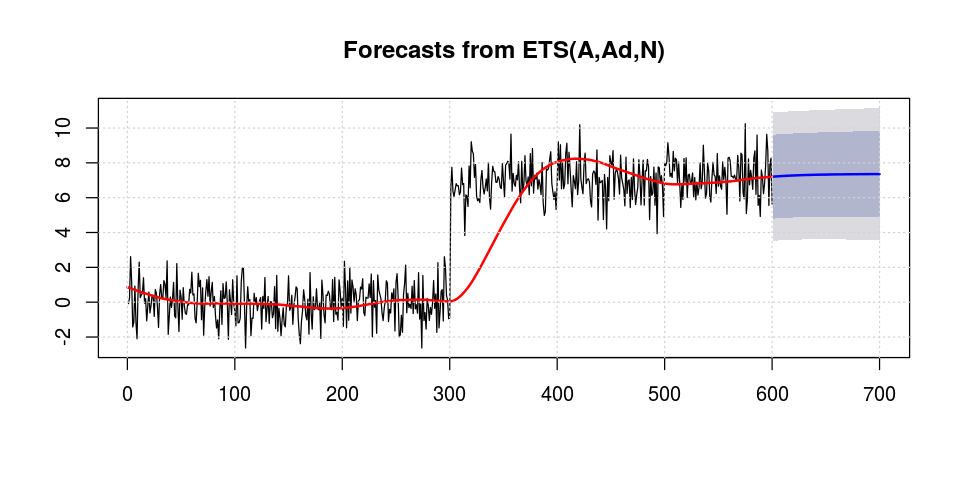

In [57]:
fitETS <- ets(tSeries, alpha = 0.001, model = 'AAZ')
fitETS

plot(forecast(fitETS, h = 100))
lines(fitETS$states[,1], col = 'red', lwd = 2)
grid()

ETS(A,Ad,N) 

Call:
 ets(y = tSeries, alpha = 0.01, beta = 1e-04) 

  Smoothing parameters:
    alpha = 0.01 
    beta  = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 0.9356 
    b = -0.0208 

  sigma:  2.0787

     AIC     AICc      BIC 
4724.239 4724.306 4741.827 

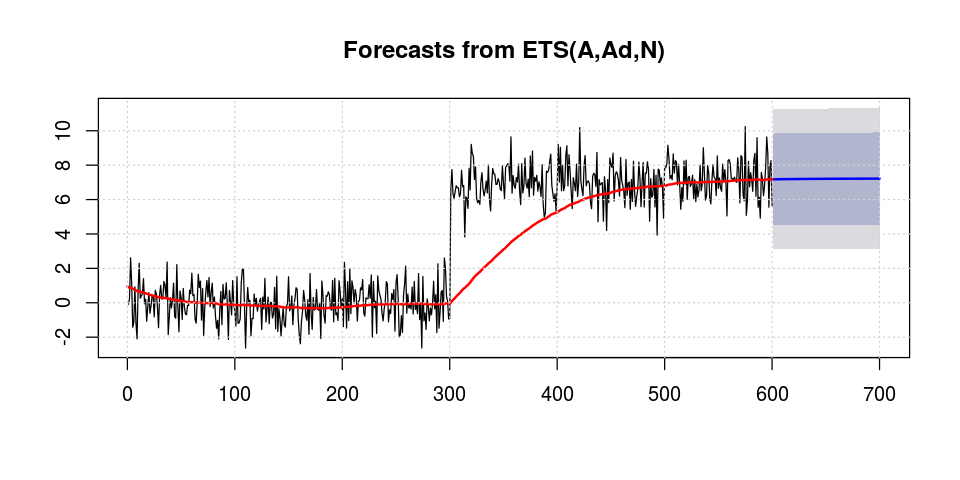

In [70]:
fitETS <- ets(tSeries, alpha = 0.01, beta = 0.0001)
fitETS

plot(forecast(fitETS, h = 100))
lines(fitETS$states[,1], col = 'red', lwd = 2)
grid()

Пусть в данных последний элемент оказался выбросом

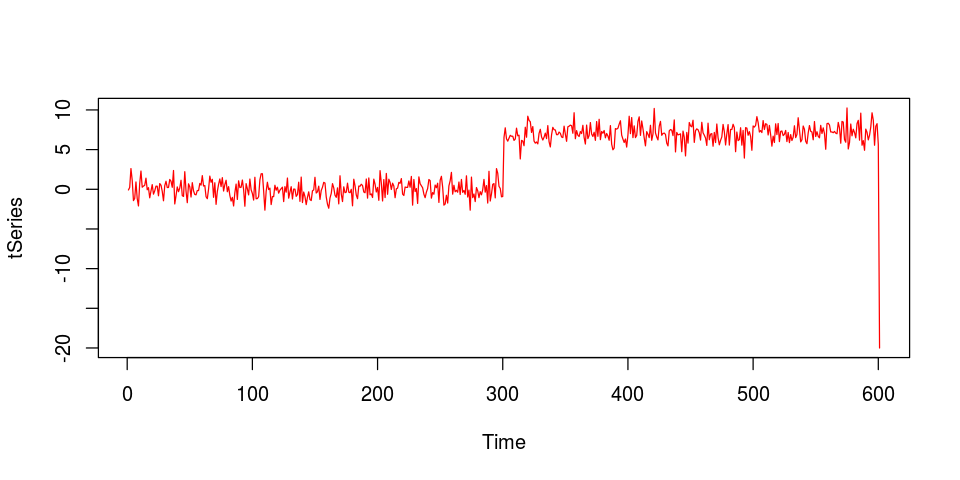

In [23]:
x1 <- c(x, -20)
tSeries <- ts(data = x1)

plot(tSeries, type = 'l', col = 'red')

Предсказание существенно сместится в сторону выброса.

ETS(A,N,N) 

Call:
 ets(y = tSeries) 

  Smoothing parameters:
    alpha = 0.2138 

  Initial states:
    l = 0.3185 

  sigma:  1.6369

     AIC     AICc      BIC 
4443.916 4443.956 4457.111 

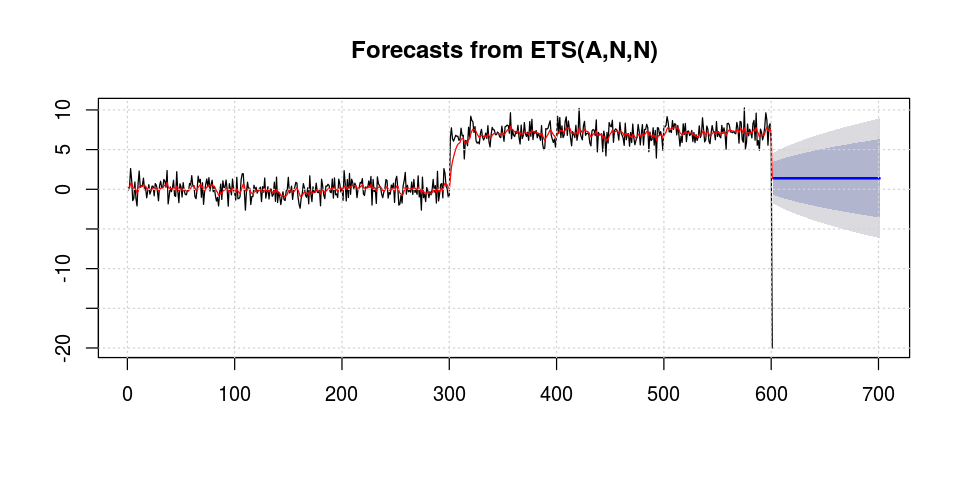

In [24]:
fitETS <- ets(tSeries)
fitETS

plot(forecast(fitETS, h = 100))
lines(fitETS$states[,1],col='red')
grid()

Рассмотрим теперь временной ряд, в котором есть тренд и сезонность.

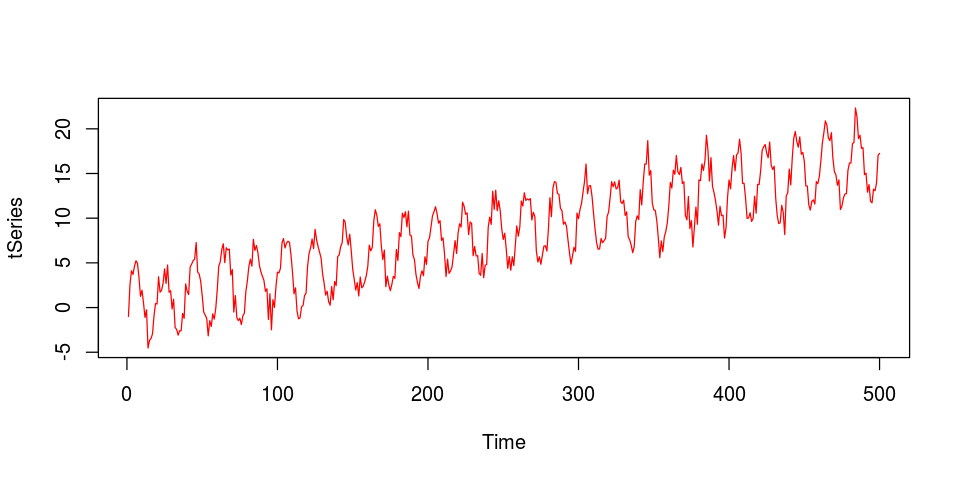

In [93]:
x <- c(rnorm(n = 500)) + 4 * sin(1:500 * pi / 10) + 1:500 / 30
tSeries <- ts(data = x)  # создание объекта временного ряда

plot(tSeries, type = 'l', col = 'red')

Зададим период сезонности явно (обычно он известен из задачи)

In [98]:
tSeries <- ts(data = x, freq = 20)
tSeries

Time Series:
Start = c(1, 1) 
End = c(25, 20) 
Frequency = 20 
  [1] -0.98570754  2.52111150  4.11704311  3.71366537  4.61856571  5.23983059
  [7]  4.95490114  3.37965198  1.25435930  1.94006694  0.54023856 -1.10261797
 [13] -0.24927575 -4.52210502 -3.66777913 -3.45061534 -2.93492143 -0.90159106
 [19]  0.45912739  0.40090539  3.44815825  1.72051262  1.93343314  2.70661198
 [25]  4.32757852  2.70445846  4.76622542  1.71558743  1.88823526 -0.15152769
 [31]  0.93438569 -2.23413536 -2.42760241 -3.08483482 -2.58579220 -2.60420315
 [37] -0.64896379 -1.20021831  2.64683530  1.82738374  1.45663354  4.54886074
 [43]  4.86656718  5.25990432  5.43422388  7.27564986  3.96661855  3.75505939
 [49]  2.93938226  1.35614091 -0.49748547 -0.83700793 -1.22208534 -3.16174719
 [55] -1.46660274 -2.12222628 -0.69830893 -1.29063451 -0.10621140  1.99718944
 [61]  4.64630927  5.11827001  6.48006460  7.14275171  5.02985243  6.69938822
 [67]  6.44802440  6.55098895  3.64067984  4.25438022 -0.49730980  1.34612821
 

Применим к нему модель экспоненциального сглаживания, которая учитывает тренд и сезонность, и построим предсказание на 100 позиций вперед

ETS(A,A,A) 

Call:
 ets(y = tSeries) 

  Smoothing parameters:
    alpha = 0.0515 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 0.2804 
    b = 0.0333 
    s=0.0459 -1.2212 -2.515 -3.373 -3.7461 -3.7437
           -4.085 -2.9632 -2.3972 -1.0871 0.0327 1.1248 2.6508 3.1697 3.5473 4.1549 3.9037 3.1852 2.0268 1.2896

  sigma:  1.0192

     AIC     AICc      BIC 
3176.368 3179.111 3281.733 

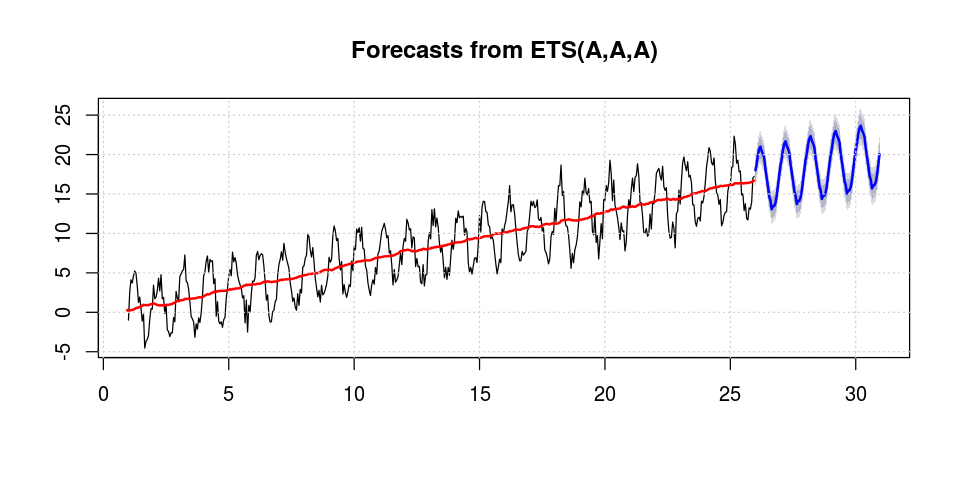

In [96]:
fitETS <- ets(tSeries)
fitETS

plot(forecast(fitETS, h = 100))
lines(fitETS$states[,1], col = 'red', lwd = 2)
grid()

На графике выше красным изображено сглаживание исходного ряда без учета сезонности. Предсказание строится как с учетом тренда, так и с учетом сезонности.

Ниже результат экспоненциального сглаживания без учета тренда и сезонности. Параметр `alpha` был подобран автоматически. Поскольку он получился большим, сглаженный ряд (красный) практически совпадает с исходным (черный, его почти не видно). Предсказанием будет константа.

ETS(A,N,N) 

Call:
 ets(y = tSeries, model = "ZNN") 

  Smoothing parameters:
    alpha = 0.9102 

  Initial states:
    l = -0.6586 

  sigma:  1.6892

     AIC     AICc      BIC 
3637.563 3637.611 3650.207 

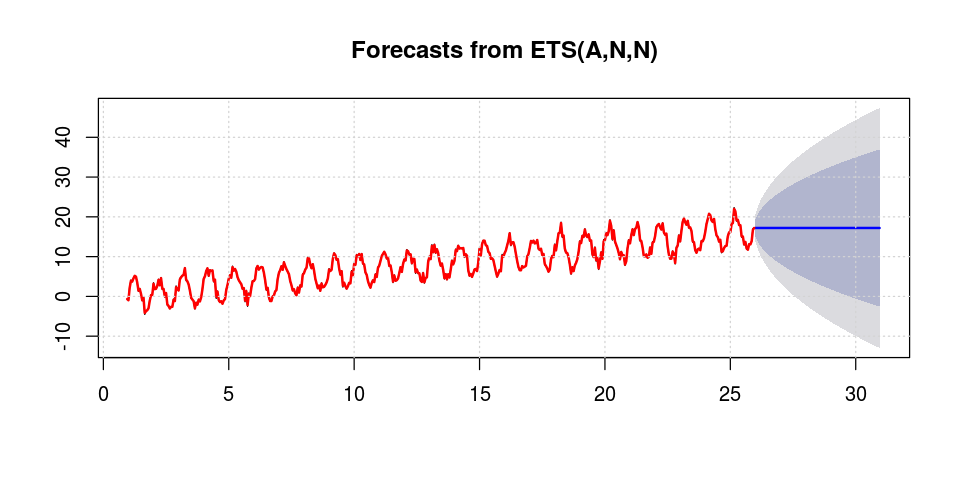

In [99]:
fitETS <- ets(tSeries, model = 'ZNN')
fitETS

plot(forecast(fitETS, h = 100))
lines(fitETS$states[,1], col = 'red', lwd = 2)
grid()

STL-декомпозиция исходного ряда. Серые полоски справа отвечают за масштаб графика.

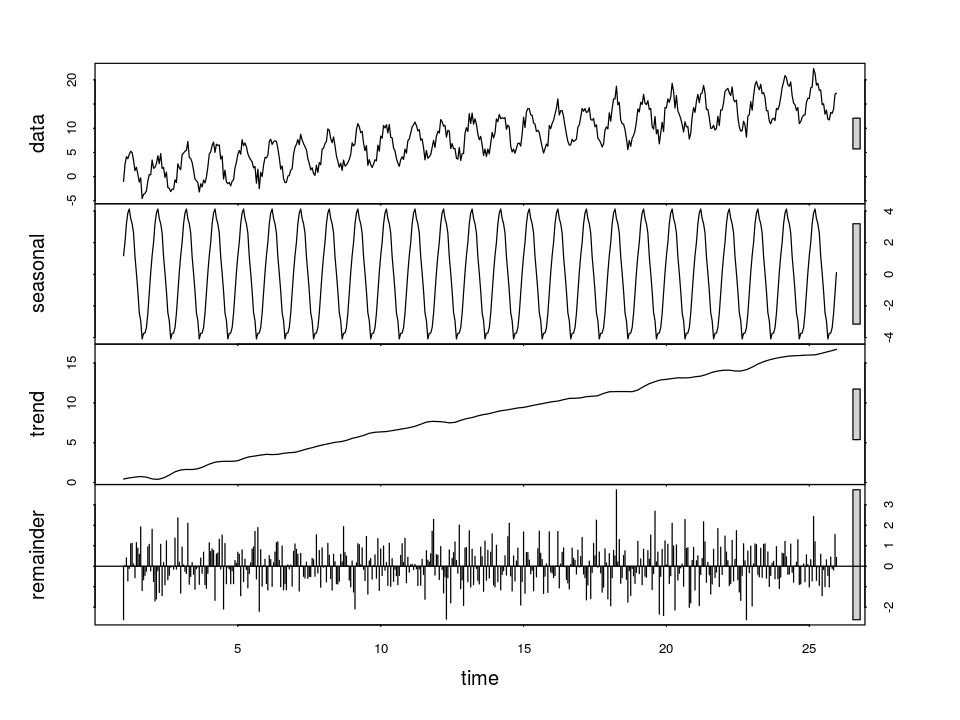

In [100]:
options(repr.plot.width = 8, repr.plot.height = 6)

stl.decompose = stl(tSeries, s.window="periodic")
plot(stl.decompose)

Посмотрим на гистограмму и QQ-plot остатков.

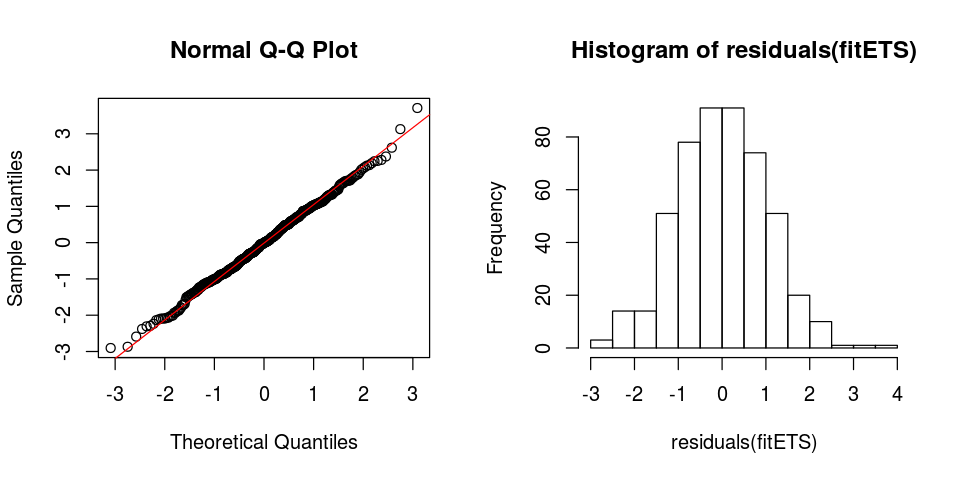

In [102]:
fitETS <- ets(tSeries)

options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow=c(1,2))
qqnorm(residuals(fitETS))
qqline(residuals(fitETS), col="red")
hist(residuals(fitETS))

Проверим несколько гипотез

* Нормальность --- критерий Шапиро-Уилка
* Несмещённость --- критерий Уилкоксона
* Стационарность --- критерий KPSS
* Гомоскедастичность --- критерий Бройша-Пагана 

In [106]:
shapiro.test(residuals(fitETS))$p.value
wilcox.test(residuals(fitETS))$p.value
kpss.test(residuals(fitETS))$p.value
bptest(residuals(fitETS) ~ c(1:length(residuals(fitETS))))$p.value

[1] 0.7081914

[1] 0.8962488

Warning message in kpss.test(residuals(fitETS)):
“p-value greater than printed p-value”

[1] 0.1

BP 
0.4717945

Критерий KPSS может не давать точных значений pvalue, поскольку их трудно рассчитывать. В данном случае он говорит, что pvalue больше, чем 0.1 -- максимальное значение, которое он может посчитать. Аналогичная ситуация с минимальным значением.

* Нормальность --- не отвергается
* Несмещённость --- не отвергается
* Стационарность --- не отвергается
* Гомоскедастичность --- не отвергается 

Функция, реализующая полный функционал различных модификаций метода ARIMA.

`auto.arima(x, d=NA, D=NA, max.p=5, max.q=5,
            max.P=2, max.Q=2, max.order=5, max.d=2, max.D=1,
            start.p=2, start.q=2, start.P=1, start.Q=1,
            stationary=FALSE, seasonal=TRUE,
            ic=c("aicc","aic", "bic"), stepwise=TRUE, trace=FALSE,
            approximation=(length(x)>100 | frequency(x)>12), xreg=NULL,
            test=c("kpss","adf","pp"), seasonal.test=c("ocsb","ch"),
            allowdrift=TRUE, lambda=NULL, parallel=FALSE, num.cores=2)`

Применим ARIMA к нашему ряду

In [107]:
fit.auto <- auto.arima(tSeries)
fit.auto

Series: tSeries 
ARIMA(1,1,0)(2,0,0)[20]                    

Coefficients:
          ar1    sar1    sar2
      -0.5053  0.3308  0.3713
s.e.   0.0409  0.0415  0.0435

sigma^2 estimated as 2.037:  log likelihood=-890.42
AIC=1788.84   AICc=1788.92   BIC=1805.69

Посмотрим на остатки

In [ ]:
res.auto <- residuals(fit.auto)[-c(1:12)]

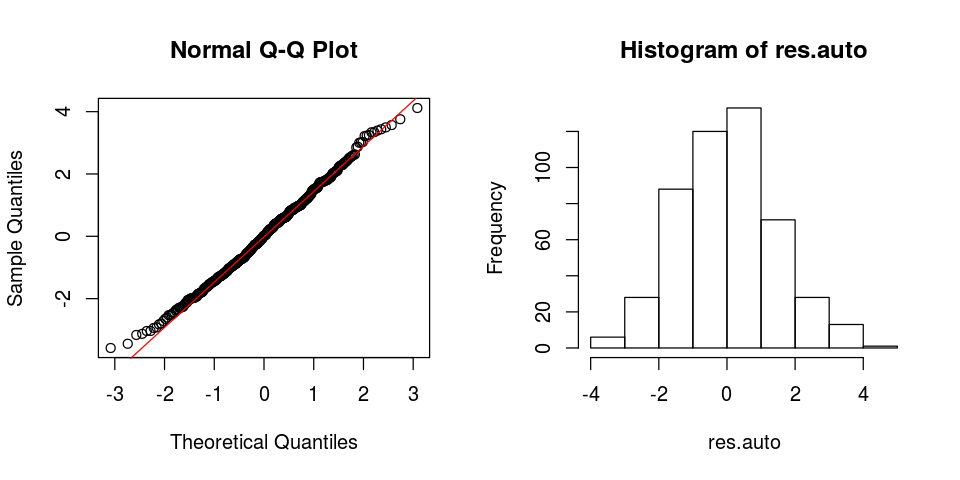

In [109]:
options(repr.plot.width = 8, repr.plot.height = 4)

par(mfrow=c(1,2))
qqnorm(res.auto)
qqline(res.auto, col="red")
hist(res.auto)

In [111]:
shapiro.test(res.auto)$p.value
wilcox.test(res.auto)$p.value
kpss.test(res.auto)$p.value
bptest(res.auto ~ c(1:length(res.auto)))$p.value

[1] 0.2527366

[1] 0.9944961

Warning message in kpss.test(res.auto):
“p-value greater than printed p-value”

[1] 0.1

BP 
0.02359769